## EDA for the airbnb dataset

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

import collections
import itertools

import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
#read the dataset
aemf_data = pd.read_csv('../data/Aemf1.csv')
aemf_data.head()

City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0      False               1         0                10.0   
1              4.0      False               0         0                 8.0   
2              2.0      False               0         1                 9.0   
3              4.0      False               0         1                 9.0   
4              2.0       True               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Attraction Index  Normalised Attraction Index  Restraunt Index  \
0         78.690379                     4.166708        98.253896   
1        631.176378                    33.421209       837.280757   
2         75.275877                     3.985908        95.386955   
3        493.272534                    26.119108       875.033098   
4        552.830324                    29.272733       815.305740   

   Normalised Restraunt Index  
0                    6.846473  
1                   58.342928  
2                    6.646700  
3                   60.973565  
4                   56.811677

In [11]:
aemf_data.describe()

Price  Person Capacity  Multiple Rooms      Business  \
count  41714.000000     41714.000000    41714.000000  41714.000000   
mean     260.094423         3.237235        0.295273      0.341180   
std      279.408493         1.299459        0.456171      0.474112   
min       34.779339         2.000000        0.000000      0.000000   
25%      144.016085         2.000000        0.000000      0.000000   
50%      203.819274         3.000000        0.000000      0.000000   
75%      297.373358         4.000000        1.000000      1.000000   
max    18545.450285         6.000000        1.000000      1.000000   

       Cleanliness Rating  Guest Satisfaction      Bedrooms  City Center (km)  \
count        41714.000000        41714.000000  41714.000000      41714.000000   
mean             9.442274           93.103179      1.165939          2.679792   
std              0.889173            8.141745      0.638157          1.996684   
min              2.000000           20.000000      0.000000          0.015045   
25%              9.000000           90.000000      1.000000          1.275913   
50%             10.000000           95.000000      1.000000          2.253237   
75%             10.000000           98.000000      1.000000          3.584489   
max             10.000000          100.000000     10.000000         25.284557   

       Metro Distance (km)  Attraction Index  Normalised Attraction Index  \
count         41714.000000      41714.000000                 41714.000000   
mean              0.603921        293.905990                    11.719658   
std               0.706206        235.750055                     8.379161   
min               0.002301         15.152201                     0.926301   
25%               0.236693        124.371614                     5.510735   
50%               0.391220        228.920599                     9.951086   
75%               0.678702        394.000201                    15.467009   
max              14.273577       4513.563486                   100.000000   

       Restraunt Index  Normalised Restraunt Index  
count     41714.000000                41714.000000  
mean        626.692618                   25.553590  
std         520.644720                   18.484572  
min          19.576924                    0.592757  
25%         210.459574                   11.132052  
50%         519.583509                   21.814414  
75%         860.708156                   36.821356  
max        6696.156772                  100.000000

<AxesSubplot: >

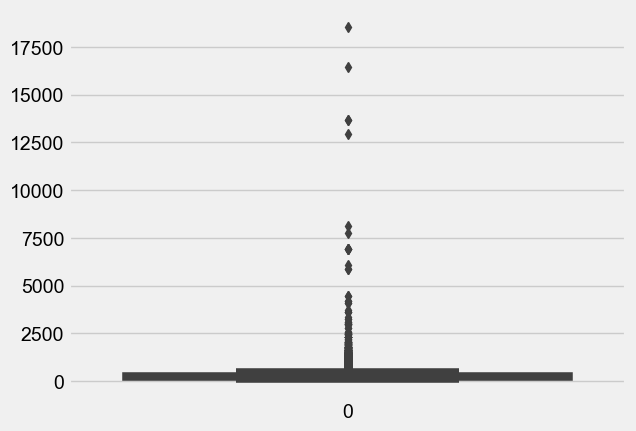

In [12]:
##changing the bool to int
aemf_data['Shared Room'] = aemf_data['Shared Room'].astype(int)
aemf_data['Private Room'] = aemf_data['Private Room'].astype(int)
aemf_data['Superhost'] = aemf_data['Superhost'].astype(int)
##viewing the outliers of price
sns.boxplot(aemf_data['Price'])

In [13]:
#plot the total price distribution plot
fig = px.histogram(aemf_data, x='Price', nbins=30)
fig.update_layout(
    title='Price Distribution',
    xaxis_title='Price',
    yaxis_title='Count'
)
fig.show()

Text(0, 0.5, 'Count')

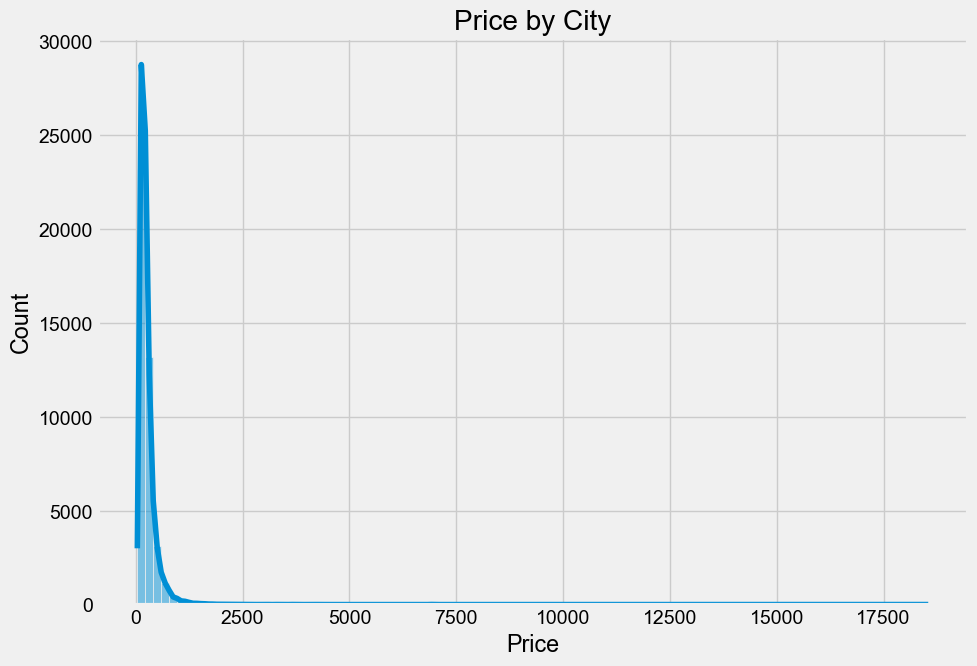

In [14]:
plt.figure(figsize = (10, 7))
sns.histplot(data = aemf_data, x = 'Price', bins = 100, multiple = 'stack', kde = True)

plt.title('Price by City')
plt.xlabel('Price')
plt.ylabel('Count')

In [15]:
col_outlier = ['Price', 'City Center (km)', 'Metro Distance (km)', 
               'Attraction Index', 'Normalised Attraction Index', 
               'Restraunt Index', 'Normalised Restraunt Index'] 

for col in col_outlier:
    Q1 = aemf_data[col].quantile(0.25)
    Q3 = aemf_data[col].quantile(0.75)

    IQR = Q3 - Q1

    limit_low = Q1 - IQR * 1.7
    limit_high = Q3 + IQR * 1.7
    
    aemf_data = aemf_data[(aemf_data[col] >= limit_low) & (aemf_data[col] <= limit_high)]

In [17]:
fig = px.histogram(aemf_data, x='Price', nbins=30)
fig.update_layout(
    title='Price Distribution',
    xaxis_title='Price',
    yaxis_title='Count'
)
fig.show()

Text(0, 0.5, 'Count')

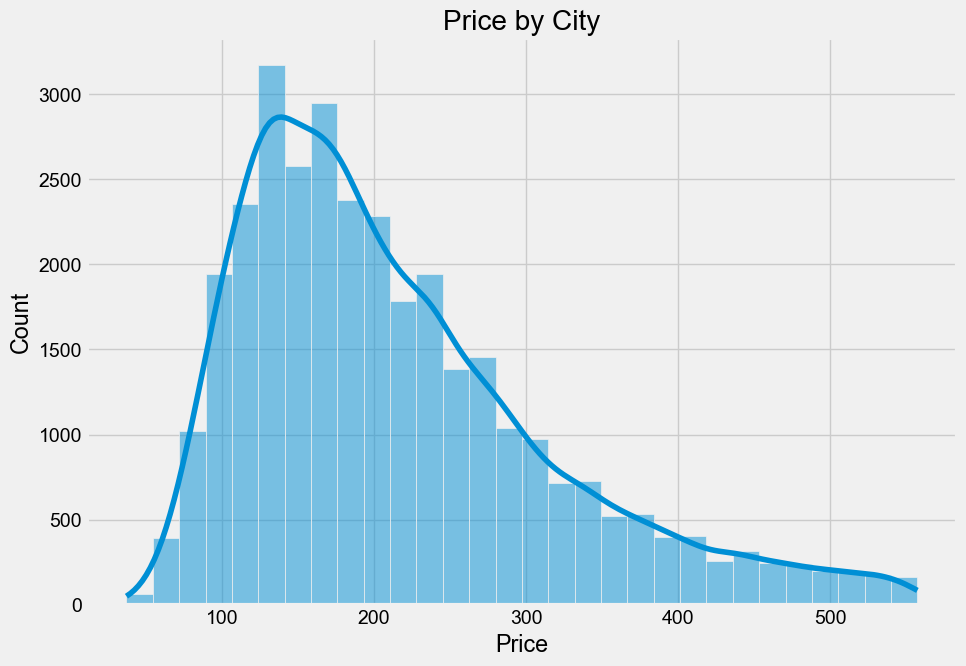

In [18]:
plt.figure(figsize = (10, 7))
sns.histplot(data = aemf_data, x = 'Price', bins = 30, multiple = 'stack', kde = True)

plt.title('Price by City')
plt.xlabel('Price')
plt.ylabel('Count')

<AxesSubplot: >

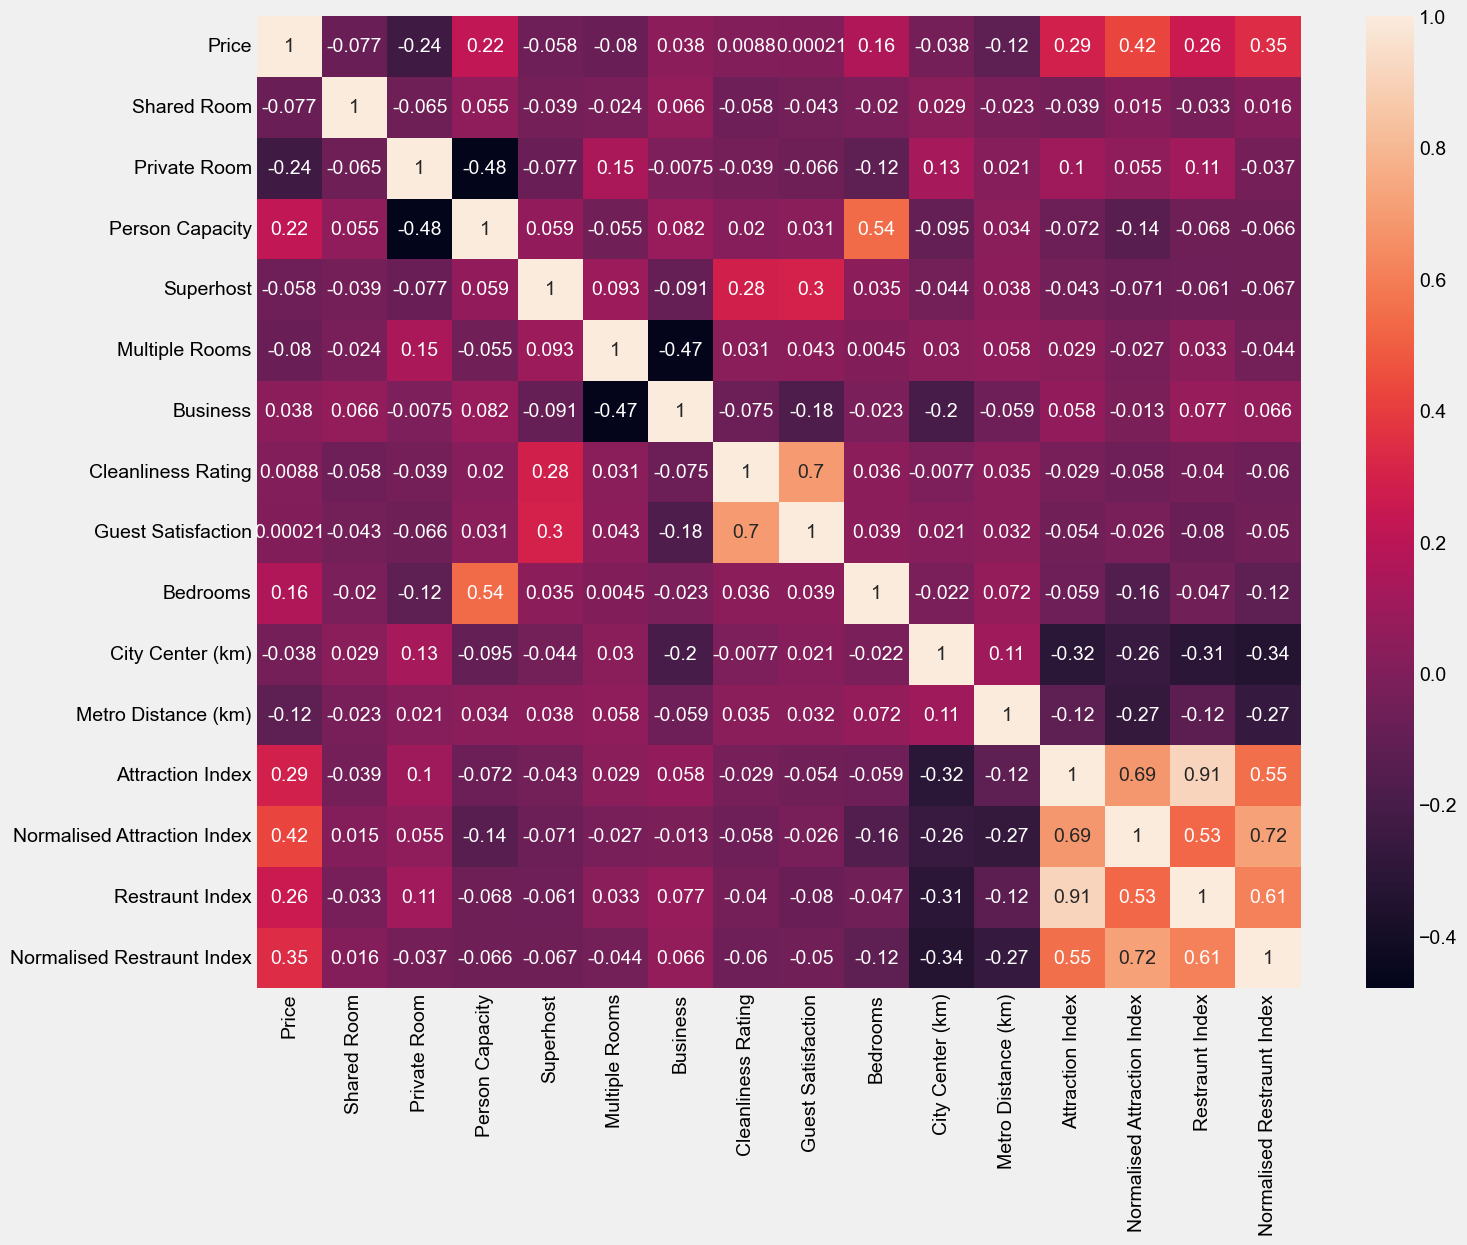

In [19]:
plt.figure(figsize = (15, 12))
sns.heatmap(aemf_data.corr(), annot = True)